In [2]:
import nltk
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import brown, treebank, conll2000
from textwrap import wrap
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, FreqDist

In [3]:
def sent_accuracy(preds, labels):
    accuracies = []
    for i in range(len(preds)):
        actual = labels[i]
        acc = 0
        for j in range(len(preds[i])):
            if preds[i][j] == actual[j]:
                acc += 1
        if len(preds[i]) > 0:
            acc = acc / len(preds[i])
        accuracies.append(acc)
    return accuracies

In [4]:
pred_garden = []
with open('hmm/pred_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        pred_garden.append(tokens)

actual_garden = []
with open('data/labels_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_garden.append(tokens)
        
garden_accs = sent_accuracy(pred_garden, actual_garden)
np.mean(garden_accs)

0.7792894935752078

In [6]:
pred_normal = []
with open('hmm/pred_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        pred_normal.append(tokens)

actual_normal = []
with open('data/labels_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_normal.append(tokens)
        
normal_accs = sent_accuracy(pred_normal, actual_normal)
np.mean(normal_accs)

0.9035336356764928

Text(0.5, 1.0, 'Accuracy of HMM predictions of garden-path sentences')

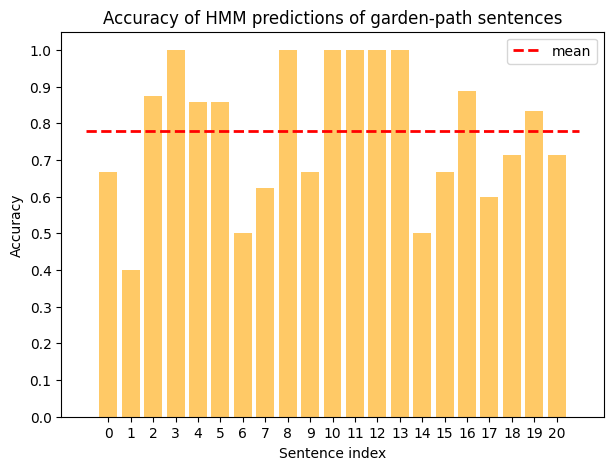

In [52]:
# Plot garden-path sentences
fig = plt.figure(figsize=(7, 5))
sent_inds = np.arange(0, 21)
plt.bar(sent_inds, garden_accs, color='orange', alpha=0.6)
garden_mean = [np.mean(garden_accs)] * 23
plt.plot(np.arange(-1, 22), garden_mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.legend()
plt.xticks(sent_inds)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Sentence index")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Accuracy of HMM predictions of garden-path sentences", 60)))

Text(0.5, 1.0, 'Accuracy of HMM predictions of normal sentences')

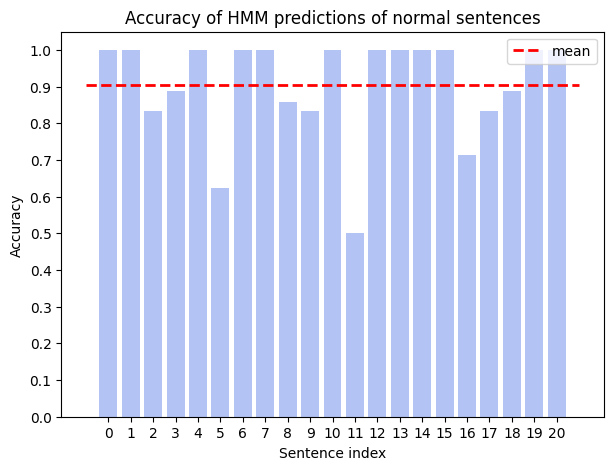

In [53]:
# Plot normal sentences
fig = plt.figure(figsize=(7, 5))
sent_inds = np.arange(0, 21)
plt.bar(sent_inds, normal_accs, color='royalblue', alpha=0.4)
normal_mean = [np.mean(normal_accs)] * 23
plt.plot(np.arange(-1, 22), normal_mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.legend()
plt.xticks(sent_inds)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Sentence index")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Accuracy of HMM predictions of normal sentences", 60)))